In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import layers,losses

In [2]:
(x_train,_), (x_test,_) = fashion_mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

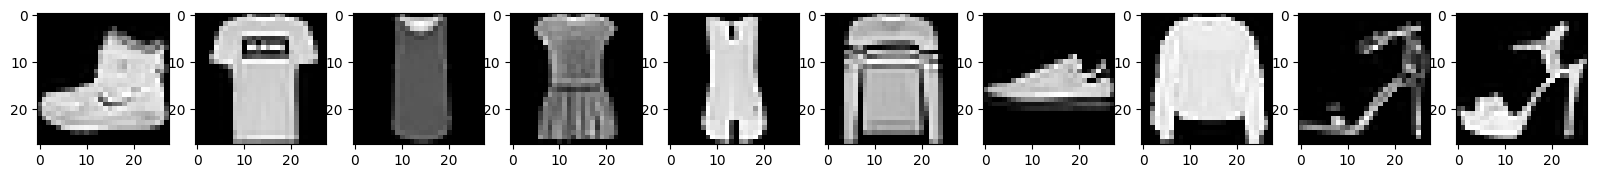

In [4]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_train[i])
  plt.gray()
plt.show()

In [5]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [6]:
x_train.max()

1.0

In [7]:
28*28

784

In [8]:
class Discriminator(Model):

    def __init__(self):

        super(Discriminator,self).__init__()

        self.dis = tf.keras.Sequential([
            layers.Flatten(),
            layers.Dense(784, activation='elu'),
            layers.Dense(256, activation='elu'),
            layers.Dense(32, activation='elu'),
            layers.Dense(1, activation='elu'),
        ])

    def call(self,x):
        dis_out = self.dis(x)

        return dis_out

In [9]:
class Generator(Model):

    def __init__(self):

        super(Generator,self).__init__()

        self.gen = tf.keras.Sequential([
            
            layers.Dense(128, activation='elu'),
            layers.Dense(256, activation='elu'),
            layers.Dense(784, activation='elu'),
            layers.Reshape((28,28,1)),
        ])

    def call(self,x):
        gen_out = self.gen(x)

        return gen_out

In [10]:
cross_entropy = losses.BinaryCrossentropy(from_logits=True)

In [11]:
def discriminator_loss(real_output,fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.ones_like(fake_output), fake_output)

    total_dis_loss = real_loss + fake_loss

    return total_dis_loss


In [12]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [13]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [14]:
EPOCHS = 50
noise_dim = 100
num_examples_to_generate = 16
BATCH_SIZE = 32

# You will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [15]:
generator = Generator()
discriminator = Discriminator()

In [16]:
# # Notice the use of `tf.function`
# # This annotation causes the function to be "compiled".
# @tf.function
# def train_step(images):
#     noise = tf.random.normal([BATCH_SIZE, noise_dim])

#     with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
#       generated_images = generator(noise, training=True)

#       real_output = discriminator(images, training=True)
#       fake_output = discriminator(generated_images, training=True)

#       gen_loss = gen_loss(fake_output)
#       disc_loss = dis_loss(real_output, fake_output)

#     gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
#     gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

#     generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
#     discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [17]:
# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(x_train).shuffle(1000).batch(BATCH_SIZE)

In [18]:
for image_batch in train_dataset:
    print(image_batch.shape)
    break

(32, 28, 28)


In [19]:
for epoch in range(EPOCHS):

    for image_batch in train_dataset:

        noise = tf.random.normal([BATCH_SIZE, noise_dim])

        with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
            generated_images = generator(noise, training=True)

            real_output = discriminator(image_batch, training=True)
            fake_output = discriminator(generated_images, training=True)

            gen_loss = generator_loss(fake_output)
            disc_loss = discriminator_loss(real_output, fake_output)

        # print(gen_loss)

        gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
        gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

        generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
        discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
    



    print ('Time for epoch {} '.format(epoch + 1))


Time for epoch 1 
Time for epoch 2 
Time for epoch 3 
Time for epoch 4 
Time for epoch 5 
Time for epoch 6 
Time for epoch 7 
Time for epoch 8 
Time for epoch 9 
Time for epoch 10 
Time for epoch 11 
Time for epoch 12 
Time for epoch 13 
Time for epoch 14 
Time for epoch 15 
Time for epoch 16 
Time for epoch 17 
Time for epoch 18 
Time for epoch 19 
Time for epoch 20 
Time for epoch 21 
Time for epoch 22 
Time for epoch 23 
Time for epoch 24 
Time for epoch 25 
Time for epoch 26 
Time for epoch 27 
Time for epoch 28 
Time for epoch 29 
Time for epoch 30 
Time for epoch 31 
Time for epoch 32 
Time for epoch 33 
Time for epoch 34 
Time for epoch 35 
Time for epoch 36 
Time for epoch 37 
Time for epoch 38 
Time for epoch 39 
Time for epoch 40 
Time for epoch 41 
Time for epoch 42 
Time for epoch 43 
Time for epoch 44 
Time for epoch 45 
Time for epoch 46 
Time for epoch 47 
Time for epoch 48 
Time for epoch 49 
Time for epoch 50 


In [22]:
noise = tf.random.normal([16, noise_dim])
predictions = generator(noise, training=False)
# predictions

<tf.Tensor: shape=(16, 28, 28, 1), dtype=float32, numpy=
array([[[[ 0.15167785],
         [ 0.07638331],
         [ 0.3702847 ],
         ...,
         [-0.2840246 ],
         [-0.3445102 ],
         [-0.3101405 ]],

        [[-0.10495454],
         [ 0.39610806],
         [ 0.28386676],
         ...,
         [ 0.5475885 ],
         [-0.20742548],
         [-0.21849197]],

        [[ 0.4687879 ],
         [-0.42960888],
         [-0.07483691],
         ...,
         [ 0.13989995],
         [-0.34982044],
         [-0.19127882]],

        ...,

        [[ 0.05086055],
         [ 0.7935788 ],
         [-0.31337333],
         ...,
         [ 0.07048833],
         [ 0.08210254],
         [-0.3339997 ]],

        [[ 0.17062873],
         [ 0.0780982 ],
         [ 0.37798646],
         ...,
         [-0.4636258 ],
         [ 0.6212545 ],
         [ 0.36569902]],

        [[ 0.03782888],
         [ 0.01677829],
         [ 0.5156698 ],
         ...,
         [-0.6428994 ],
         [ 0.044061

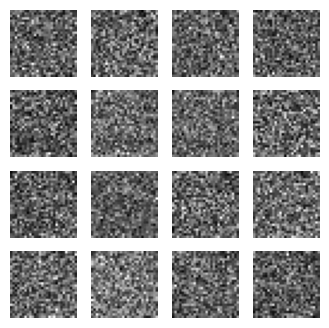

In [23]:


fig = plt.figure(figsize=(4, 4))

for i in range(predictions.shape[0]):
    plt.subplot(4, 4, i+1)
    plt.imshow(predictions[i, :, :, 0], cmap='gray')
    plt.axis('off')

#   plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
plt.show()